In [ ]:
# work with black and shite images of size 28x28=784 pixels. 
# try to predict what number is in the image based on the image data 
# in the form of an array

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 1, read the data

In [173]:
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [39]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/tensorflow/examples/tutorials/mnist/input_data.py'>

In [40]:
type(input_data)

module

In [41]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1182922b0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c37e2fef0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c37e2feb8>)

In [42]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [43]:
mnist.train

In [44]:
type(mnist.train)

tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet

In [45]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [46]:
type(mnist.train.images)

numpy.ndarray

In [47]:
mnist.train.images.shape

(55000, 784)

In [124]:
mnist.train.num_examples

55000

In [48]:
type(mnist.train.images.shape)

tuple

In [49]:
mnist.train.images.reshape

<function ndarray.reshape>

In [50]:
type(mnist.train.images.reshape)

builtin_function_or_method

In [51]:
# take a look at one of the images

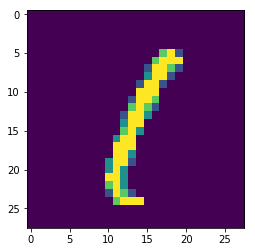

In [191]:
plt.imshow(mnist.train.images[1].reshape(28,28))

# 2, create the layers

In [56]:
# tensorflow graph input

In [207]:
n_hidden_1=256# 256 neurons is just a common number for each layer
n_hidden_2=256
n_input=784 # 28x28 which is the size of the picture
n_classes=10 # total classes
# x and y will be use in function 'add' later
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])


In [175]:
# create 2 dictionaries contained the weight and bias objects for the model
weights={
    'w1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'w2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [176]:
# create the layers
# relu= an activation function, which is a simple rectifier function which
# either returns x or zero
# use linear activation with matrix mul here
def multilayer_perceptron(x, weights, biases):
    layer_1=tf.add(tf.matmul(x,weights['w1']), biases['b1'])
    # RELU(x * w + b) -> f(x)=max(0,x)
    layer_1=tf.nn.relu(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2=tf.nn.relu(layer_2)
    
    out_layer=tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# define loss and optimizer, and init.. the variables

In [177]:
pred=multilayer_perceptron(x, weights, biases)
learning_rate = 0.001

In [178]:
# create the variables for cost and optimization functions
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# run the session

In [123]:
mnist.train.num_examples

55000

In [135]:
 mnist.train.next_batch(batch_size)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([0, 8, 7, 4, 1, 3, 3, 3, 6, 9, 6, 4, 0, 5, 7, 7, 9, 5, 5, 1, 9, 7, 4,
        7, 5, 4, 0, 7, 0, 8, 6, 1, 6, 0, 4, 9, 3, 6, 4, 9, 9, 6, 0, 1, 0, 5,
        3, 7, 9, 4, 2, 6, 3, 3, 8, 5, 3, 9, 0, 1, 0, 5, 9, 2, 2, 7, 1, 6, 8,
        1, 3, 8, 1, 4, 1, 0, 7, 7, 2, 1, 1, 7, 5, 9, 5, 4, 9, 8, 1, 0, 6, 4,
        7, 2, 2, 0, 4, 8, 0, 8], dtype=uint8))

In [181]:
training_epochs = 15
batch_size = 100
n_samples = mnist.train.num_examples

#init must place before sess
init=tf.initialize_all_variables()

# lunch the session
sess=tf.InteractiveSession()
# intilialize all the variables
sess.run(init)

In [182]:
# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
print('\n')
print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=168.0663
Epoch: 2 cost=41.7244
Epoch: 3 cost=26.0072
Epoch: 4 cost=17.8791
Epoch: 5 cost=12.8418
Epoch: 6 cost=9.4039
Epoch: 7 cost=7.0934
Epoch: 8 cost=5.3441
Epoch: 9 cost=3.8813
Epoch: 10 cost=2.9123
Epoch: 11 cost=2.1522
Epoch: 12 cost=1.6293
Epoch: 13 cost=1.3735
Epoch: 14 cost=0.9683
Epoch: 15 cost=0.8609


Model has completed 15 Epochs of Training


In [202]:
#a check of predictions == y_test
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [198]:
correct_predictions[1]

<tf.Tensor 'strided_slice_3:0' shape=() dtype=bool>

In [204]:
#In order to get a numerical value for our predictions we will 
#need to use tf.cast to cast the Tensor of booleans back into a Tensor 
#of Floating point values in order to take the mean of it.
correct_predictions = tf.cast(correct_predictions, "float")

In [205]:
accuracy = tf.reduce_mean(correct_predictions)

In [206]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9489


In [ ]:
# 95% of the chance to correctly identify the number in the images